In [199]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny
from skimage import data

In [200]:
import os
image = cv2.imread(os.path.join(os.path.abspath(""), '0_predict.png'))
org_image = cv2.imread(os.path.join(os.path.abspath(""), '0.png'))

Text(0.5, 1.0, 'Predicted Segment')

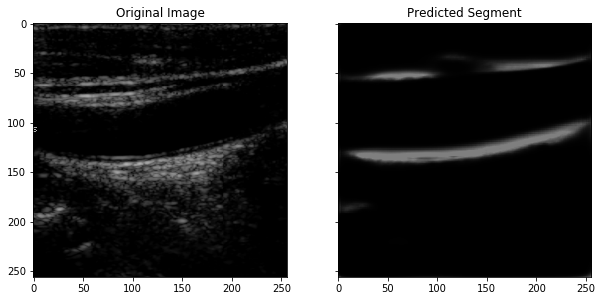

In [201]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(org_image, interpolation='nearest')
ax[0].set_title('Original Image')
ax[1].imshow(image, interpolation='nearest')
ax[1].set_title('Predicted Segment')

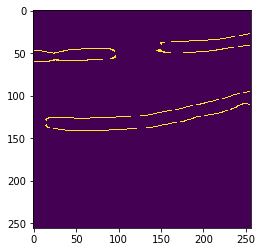

In [202]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = canny(gray, 6, 1, 25)
# edges = canny(gray, sigma=6.0, low_threshold=1, high_threshold=25, mask=None, use_quantiles=None)
lines = probabilistic_hough_line(edges, threshold=6, line_length=5,
                                 line_gap=3)
plt.imshow(edges)
plt.show()


Text(0.5, 1.0, 'Removed Image')

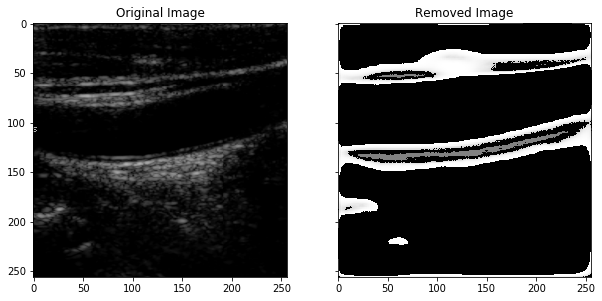

In [203]:
from skimage import morphology
from PIL import Image
# thresh = 127
# im_bw = cv2.threshold(gray, thresh, 255, cv2.THRESH_BINARY)[1]
# les_image = morphology.erosion(org_image)
les_image = morphology.remove_small_objects(image, 150)
les_image = les_image.astype('uint8')*255
les_image
im = Image.fromarray(les_image)

fig, axes = plt.subplots(ncols=2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(org_image, interpolation='nearest')
ax[0].set_title('Original Image')
ax[1].imshow(im, interpolation='nearest')
ax[1].set_title('Removed Image')


Text(0.5, 1.0, 'Predicted Segment')

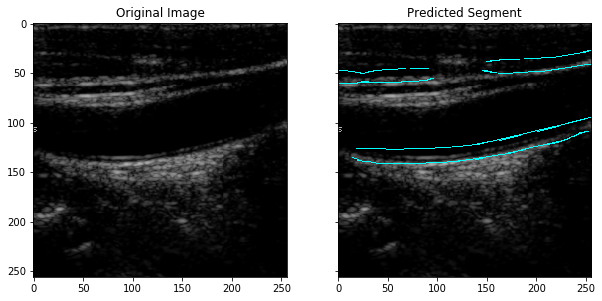

In [204]:
test_image = org_image.copy()
for ((x1,y1),(x2,y2)) in lines:
    cv2.line(test_image,(x1,y1),(x2,y2),(0,255,255),1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(org_image, interpolation='nearest')
ax[0].set_title('Original Image')
ax[1].imshow(test_image, interpolation='nearest')
ax[1].set_title('Predicted Segment')

### OTHER  TEST

AttributeError: 'numpy.ndarray' object has no attribute 'add_patch'

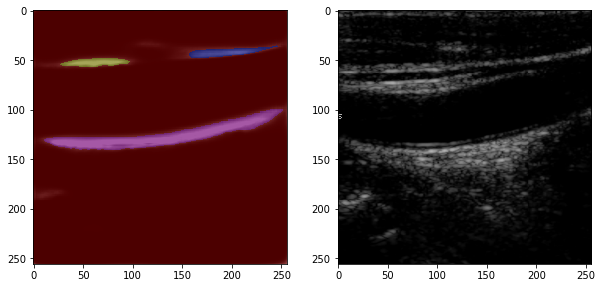

In [215]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


image = gray
# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(ncols=2,figsize=(10, 6))
ax[0].imshow(image_label_overlay)
ax[1].imshow(org_image)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

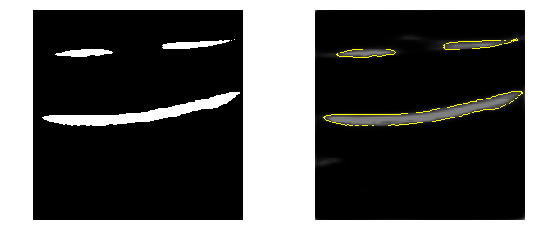

In [214]:
from skimage import data, segmentation
from skimage import filters
import matplotlib.pyplot as plt
import numpy as np

coins = image
mask = coins > filters.threshold_otsu(coins)
clean_border = segmentation.clear_border(mask).astype(np.int)

coins_edges = segmentation.mark_boundaries(coins, clean_border)

plt.figure(figsize=(8, 3.5))
plt.subplot(121)
plt.imshow(clean_border, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(coins_edges)
plt.axis('off')


plt.tight_layout()
plt.show()